# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [19]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [20]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [21]:
print(project_data['teacher_prefix'].unique())

['Mrs.' 'Mr.' 'Ms.' 'Teacher' nan 'Dr.']


In [22]:
print(project_data.isnull().sum())

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


In [23]:
project_data=project_data.dropna(subset=['teacher_prefix'])

In [24]:
print(project_data['teacher_prefix'].unique())

['Mrs.' 'Mr.' 'Ms.' 'Teacher' 'Dr.']


In [25]:
print(project_data.isnull().sum())

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       0
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105488
project_essay_4                                 105488
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


In [26]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109245, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [27]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [28]:
print(project_data['teacher_prefix'].unique())

['Mrs.' 'Mr.' 'Ms.' 'Teacher' 'Dr.']


## 1.2 preprocessing of `project_subject_categories`

In [29]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [30]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `school_state`

In [31]:
school_state_catagories = list(project_data['school_state'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

school_state_list = []
for i in school_state_catagories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    school_state_list.append(temp.strip())

project_data['school_state_catag'] = school_state_list

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['school_state_catag'].values:
    my_counter.update(word.split())
school_state_catag_dict = dict(my_counter)
sorted_school_state_catag_dict = dict(sorted(school_state_catag_dict.items(), key=lambda kv: kv[1]))
print(sorted_school_state_catag_dict)

{'VT': 80, 'WY': 98, 'ND': 143, 'MT': 245, 'RI': 285, 'SD': 300, 'NE': 309, 'DE': 343, 'AK': 345, 'NH': 348, 'WV': 503, 'ME': 505, 'HI': 507, 'DC': 516, 'NM': 557, 'KS': 634, 'IA': 666, 'ID': 693, 'AR': 1049, 'CO': 1111, 'MN': 1208, 'OR': 1242, 'KY': 1304, 'MS': 1323, 'NV': 1367, 'MD': 1514, 'CT': 1663, 'TN': 1688, 'UT': 1731, 'AL': 1762, 'WI': 1827, 'VA': 2045, 'AZ': 2147, 'NJ': 2237, 'OK': 2276, 'WA': 2334, 'MA': 2389, 'LA': 2394, 'OH': 2467, 'MO': 2576, 'IN': 2620, 'PA': 3108, 'MI': 3161, 'SC': 3935, 'GA': 3963, 'IL': 4350, 'NC': 5091, 'FL': 6185, 'NY': 7318, 'TX': 7396, 'CA': 15387}


## 1.3 preprocessing of `preprocessing of teacher_prefix`

In [32]:
import pandas as pd
teacher_prefix_catagories = list(project_data['teacher_prefix'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

teacher_prefix_list = []
for i in str(teacher_prefix_catagories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    teacher_prefix_list.append(temp.strip())

project_data['teacher_prefix_catag'] = pd.DataFrame(teacher_prefix_list)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['teacher_prefix_catag'].values:
    my_counter.update(str(word).split())
teacher_prefix_catag_dict = dict(my_counter)
sorted_teacher_prefix_catag_dict = dict(sorted(teacher_prefix_catag_dict.items(), key=lambda kv: kv[1]))
print(sorted_teacher_prefix_catag_dict)

{'[': 1, 'T': 335, 'a': 335, 'c': 335, 'h': 335, 'e': 670, 'r': 9122, 's': 12603, 'M': 14029, '.': 14029, "'": 28727}


## 1.3 preprocessing of `project_grade_subcategory¶`

In [33]:
import pandas as pd
project_grade_catagories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

project_grade_list = []
for i in str(project_grade_catagories):
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    project_grade_list.append(temp.strip())

project_data['project_grade_catag'] = pd.DataFrame(project_grade_list)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['project_grade_catag'].values:
    my_counter.update(word.split())
project_grade_catag_dict = dict(my_counter)
sorted_project_grade_catag_dict = dict(sorted(project_grade_catag_dict.items(), key=lambda kv: kv[1]))
print(sorted_project_grade_catag_dict)

{'[': 1, '9': 698, '1': 698, '6': 1086, '8': 1086, '3': 2451, '5': 2451, 'K': 2897, 'P': 2898, '2': 3595, 'a': 7132, '-': 7132, 'G': 7133, 'd': 7133, 's': 7133, 'r': 10030, 'e': 10030, "'": 14265}


## 1.3 Text preprocessing

In [34]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [35]:
# https://www.sanfoundry.com/python-program-count-number-words-characters-file/
# getting title word count

title_word_count = []
for itr1 in project_data["project_title"] :
    itr2 = len(itr1.split())
    title_word_count.append(itr2)
project_data["title_word_count"] = title_word_count

print(len(project_data["title_word_count"]))

109245


In [36]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2       ...         \
0  \"The limits of your language are the limits o...       ...          
1  The projector we need for our school is very c...       ...          

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

  school_state_catag teacher_prefix_catag project_grade_catag  \
0                 IN                    [                   [   
1                 FL                    '                   '   

                                               essay title_word_count  
0  My students are English learners that are work...                7  
1  Our students arrive to our school eager to lea...                5  

[2 rows x 22 columns]

In [37]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [38]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [39]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [40]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.\r\nMy students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things. \r\nAll of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.\r\nThis will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They lea

In [41]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.  My students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things.   All of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.  This will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They learn so 

In [42]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My wonderful students are 3 4 and 5 years old We are located in a small town outside of Charlotte NC All of my 22 students are children of school district employees My students are bright energetic and they love to learn They love hands on activities that get them moving Like most preschoolers they enjoy music and creating different things All of my students come from wonderful families that are very supportive of our classroom Our parents enjoy watching their children is growth as much as we do These materials will help me teach my students all about the life cycle of a butterfly We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis After a few weeks they will emerge from the chrysalis as beautiful butterflies We already have a net for the chrysalises but we still need the caterpillars and feeding station This will be an unforgettable experience for my students My student absolutely love hands on materials They learn so much from getting to touch and man

In [43]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [44]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109245/109245 [01:37<00:00, 1123.01it/s]


In [45]:
# after preprocesing
print(preprocessed_essays[0:2])

['my students english learners working english second third languages we melting pot refugees immigrants native born americans bringing gift language school we 24 languages represented english learner program students every level mastery we also 40 countries represented families within school each student brings wealth knowledge experiences us open eyes new cultures beliefs respect the limits language limits world ludwig wittgenstein our english learner strong support system home begs resources many times parents learning read speak english along side children sometimes creates barriers parents able help child learn phonetics letter recognition reading skills by providing dvd players students able continue mastery english language even no one home able assist all families students within level 1 proficiency status offered part program these educational videos specially chosen english learner teacher sent home regularly watch the videos help child develop early reading skills parents no

In [46]:
project_data["preprocessed_essays"]=preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [47]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [48]:
sent = decontracted(project_data['project_title'].values[84240])
print(sent)
print("="*50)

Help us with basic science supplies


In [49]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Help us with basic science supplies


In [50]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Help us with basic science supplies


In [51]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [52]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109245/109245 [00:04<00:00, 26364.49it/s]


In [53]:
print(preprocessed_titles[53515])

opening eyes world around us


## 1.5 Preparing data for models

In [54]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'school_state_catag',
       'teacher_prefix_catag', 'project_grade_catag', 'essay',
       'title_word_count', 'preprocessed_essays'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [55]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
catag_vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = catag_vectorizer.fit_transform(project_data['clean_categories'].values)
print(catag_vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109245, 9)


In [56]:
# we use count vectorizer to convert the values into one 
sub_catag_vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = sub_catag_vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(sub_catag_vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109245, 30)


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
# you can do the similar thing with state, teacher_prefix and project_grade_category also
school_vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_catag_dict.keys()), lowercase=False, binary=True)
school_state_categories_one_hot = school_vectorizer.fit_transform(project_data['school_state_catag'].values)
print(school_vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",school_state_categories_one_hot.shape)
# from sklearn.feature_extraction.text import CountVectorizer
# # you can do the similar thing with state, teacher_prefix and project_grade_category also
# school_vectorizer = CountVectorizer()
# school_state_categories_one_hot = school_vectorizer.fit_transform(project_data['school_state'].astype('U'))
# print(school_vectorizer.get_feature_names())
# print("Shape of matrix after one hot encodig ",school_state_categories_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (109245, 51)


In [58]:
# sorted_teacher_prefix_catag_dict.keys()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
# you can do the similar thing with state, teacher_prefix and project_grade_category also
teach_vectorizer = CountVectorizer()
teacher_prefix_catagories_one_hot = teach_vectorizer.fit_transform(project_data['teacher_prefix'].astype('U'))
print(teach_vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_catagories_one_hot.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encodig  (109245, 5)


In [60]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'school_state_catag',
       'teacher_prefix_catag', 'project_grade_catag', 'essay',
       'title_word_count', 'preprocessed_essays'],
      dtype='object')

In [61]:
print(project_data['project_grade_category'].values)

['Grades PreK-2' 'Grades 6-8' 'Grades 6-8' ..., 'Grades PreK-2'
 'Grades 3-5' 'Grades 6-8']


In [62]:
# from sklearn.feature_extraction.text import CountVectorizer
# # you can do the similar thing with state, teacher_prefix and project_grade_category also
# project_grade_vectorizer = CountVectorizer()
# project_grade_catagories_one_hot = project_grade_vectorizer.fit_transform(project_data['project_grade_category'].astype('U'))
# print(project_grade_vectorizer.get_feature_names())
# # print("Shape of matrix after one hot encodig ",project_grade_catagories_one_hot.shape)
from sklearn.feature_extraction.text import CountVectorizer
# you can do the similar thing with state, teacher_prefix and project_grade_category also
project_grade_vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_catag_dict.keys()), lowercase=False, binary=True)
project_grade_catagories_one_hot = project_grade_vectorizer.fit_transform(project_data['school_state_catag'].values)
print(project_grade_vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",project_grade_catagories_one_hot.shape)

['[', '9', '1', '6', '8', '3', '5', 'K', 'P', '2', 'a', '-', 'G', 'd', 's', 'r', 'e', "'"]
Shape of matrix after one hot encodig  (109245, 18)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
project_data_reduced=project_data[0:3000]
reduced_data=project_data_reduced.drop(['id','teacher_id','project_essay_3','project_essay_4','project_essay_1','project_essay_2'], axis=1)
# print(reduced_data.head())
final_reduced_data=reduced_data.fillna(0)  # filling rows with 0 values 
# print(final_reduced_data.isnull().sum())  # getting cleaned data
y=project_data_reduced['project_is_approved'].values
X_train, X_test, y_train, y_test = train_test_split(final_reduced_data, y, test_size=0.20, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)
print(X_train.columns)
# print(X_train.shape, y_train.shape)
# print(X_cv.shape, y_cv.shape)
# print(X_test.shape, y_test.shape)
# print(final_reduced_data["essay"])

Index(['Unnamed: 0', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'school_state_catag',
       'teacher_prefix_catag', 'project_grade_catag', 'essay',
       'title_word_count', 'preprocessed_essays'],
      dtype='object')


In [64]:
# BOW for titles(project_data)
from sklearn.feature_extraction.text import CountVectorizer
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
final_vectorizer = CountVectorizer(min_df=10)
titles_bow = final_vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encoding ",titles_bow.shape)

Shape of matrix after one hot encoding  (109245, 3222)


In [66]:
# BOW for titles(train data)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values)
X_train_title_bow = vectorizer.fit_transform(X_train['project_title'].values)
# bow_lis=[]
# bow_lis.extend(vectorizer.get_feature_names())
# bow_lis.extend(catag_vectorizer.get_feature_names())
# bow_lis.extend(sub_catag_vectorizer.get_feature_names())
# bow_lis.extend(school_vectorizer.get_feature_names())
# bow_lis.extend(teach_vectorizer.get_feature_names())
# bow_lis.extend(project_grade_vectorizer.get_feature_names())
# bow_lis.append('price')
# bow_lis.append('quantiity')
# bow_lis.append('title_word_count')
# bow_lis.append('compound')
# bow_lis.append('positive')
# bow_lis.append('neutral')
# bow_lis.append('negative')
print("Shape of matrix after one hot encoding ",X_train_title_bow.shape)
# print(len(bow_lis))
# print("Shape of matrix after one hot encoding ",X_train_title_bow.shape)

Shape of matrix after one hot encoding  (1920, 161)


In [67]:
# BOW for titles(test data)
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(X_test['project_title'].values)
X_test_title_bow = vectorizer.transform(X_test['project_title'].values)
print("Shape of matrix after one hot encoding ",X_test_title_bow.shape)

Shape of matrix after one hot encoding  (600, 161)


In [68]:
# BOW for titles(CV data)
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(X_cv['project_title'].values)
X_cv_title_bow = vectorizer.transform(X_cv['project_title'].values)
print("Shape of matrix after one hot encoding ",X_cv_title_bow.shape)

Shape of matrix after one hot encoding  (480, 161)


In [69]:
# BOW for essays(project_data)
from sklearn.feature_extraction.text import CountVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
essays_bow = vectorizer.fit_transform(preprocessed_essays[0:10000])
print("Shape of matrix after one hot encodig",essays_bow.shape)

Shape of matrix after one hot encodig (10000, 6212)


In [70]:
# BOW for essays(train data)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)
X_train_essay_bow = vectorizer.fit_transform(X_train['essay'].values)
print("Shape of matrix after one hot encoding ",X_train_essay_bow.shape)

Shape of matrix after one hot encoding  (1920, 2698)


In [71]:
# BOW for essays(test data)
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(X_test['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
print("Shape of matrix after one hot encoding ",X_test_essay_bow.shape)

Shape of matrix after one hot encoding  (600, 2698)


In [72]:
# BOW for essays(cv data)
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(min_df=10)
# vectorizer.fit(X_cv['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
print("Shape of matrix after one hot encoding ",X_cv_essay_bow.shape)

Shape of matrix after one hot encoding  (480, 2698)


#### 1.5.2.2 TFIDF vectorizer

In [73]:
# Tfidf for essays(project_data)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
essays_tfidf = vectorizer.fit_transform(preprocessed_essays[0:10000])
print("Shape of matrix after one hot encodig ",essays_tfidf.shape)

Shape of matrix after one hot encodig  (10000, 6212)


In [74]:
# Tfidf for essays(train)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'].values)
print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)

Shape of matrix after one hot encodig  (1920, 2698)


In [75]:
# Tfidf for essays(test)
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
print("Shape of matrix after one hot encodig ",X_test_essay_tfidf.shape)

Shape of matrix after one hot encodig  (600, 2698)


In [76]:
# Tfidf for essays(cv)
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
print("Shape of matrix after one hot encodig ",X_cv_essay_tfidf.shape)

Shape of matrix after one hot encodig  (480, 2698)


In [77]:
# Tfidf for titles(project_data) 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)

Shape of matrix after one hot encodig  (109245, 3222)


In [78]:
# Tfidf for titles(train)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X_train_titles_tfidf = vectorizer.fit_transform(X_train['project_title'].values)
print("Shape of matrix after one hot encodig ",X_train_titles_tfidf.shape)

Shape of matrix after one hot encodig  (1920, 161)


In [79]:
# Tfidf for titles(test)
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
X_test_titles_tfidf = vectorizer.transform(X_test['project_title'].values)
print("Shape of matrix after one hot encodig ",X_test_titles_tfidf.shape)

Shape of matrix after one hot encodig  (600, 161)


In [80]:
# Tfidf for titles(cv)
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(min_df=10)
X_cv_titles_tfidf = vectorizer.transform(X_cv['project_title'].values)
print("Shape of matrix after one hot encodig ",X_cv_titles_tfidf.shape)

Shape of matrix after one hot encodig  (480, 161)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [81]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [82]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [83]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays[0:10000]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays.append(vector)

print(len(avg_w2v_vectors_essays))
print(len(avg_w2v_vectors_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2124.80it/s]


10000
300


In [84]:
# average Word2Vec(train)
# compute average word2vec for each review.
X_train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_essays.append(vector)

print(len(X_train_avg_w2v_vectors_essays))
print(len(X_train_avg_w2v_vectors_essays[0]))

100%|████████████████████████████████████████████████████████████████████████████| 1920/1920 [00:01<00:00, 1418.83it/s]


1920
300


In [85]:
# average Word2Vec(test)
# compute average word2vec for each review.
X_test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_essays.append(vector)

print(len(X_test_avg_w2v_vectors_essays))
print(len(X_test_avg_w2v_vectors_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 1460.76it/s]


600
300


In [86]:
# average Word2Vec(cv)
# compute average word2vec for each review.
X_cv_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_essays.append(vector)

print(len(X_cv_avg_w2v_vectors_essays))
print(len(X_cv_avg_w2v_vectors_essays[0]))

100%|██████████████████████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1450.98it/s]


480
300


In [87]:
# average Word2Vec
# compute average word2vec for each title.
avg_w2v_vectors_titles = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(preprocessed_titles[0:10000]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_titles.append(vector)

print(len(avg_w2v_vectors_titles))
print(len(avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 33463.84it/s]


10000
300


In [88]:
# average Word2Vec(train)
# compute average word2vec for each title.
X_train_avg_w2v_vectors_titles = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_train["project_title"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_titles.append(vector)

print(len(X_train_avg_w2v_vectors_titles))
print(len(X_train_avg_w2v_vectors_titles[0]))

100%|███████████████████████████████████████████████████████████████████████████| 1920/1920 [00:00<00:00, 33126.00it/s]


1920
300


In [89]:
# average Word2Vec(test)
# compute average word2vec for each title.
X_test_avg_w2v_vectors_titles = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_test["project_title"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_titles.append(vector)

print(len(X_test_avg_w2v_vectors_titles))
print(len(X_test_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 46178.37it/s]


600
300


In [90]:
# average Word2Vec(cv)
# compute average word2vec for each title.
X_cv_avg_w2v_vectors_titles = []; # the avg-w2v for each title is stored in this list
for sentence in tqdm(X_cv["project_title"]): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_avg_w2v_vectors_titles.append(vector)

print(len(X_cv_avg_w2v_vectors_titles))
print(len(X_cv_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 60032.98it/s]


480
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [91]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays[0:10000])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [92]:
# average Word2Vec(project_data)
# compute average word2vec for each review.
essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays[0:10000]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essays_tfidf_w2v_vectors.append(vector)

print(len(essays_tfidf_w2v_vectors))
print(len(essays_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:31<00:00, 314.91it/s]


10000
300


In [93]:
# average Word2Vec(train)
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_essays.append(vector)

print(len(X_train_tfidf_w2v_vectors_essays))
print(len(X_train_tfidf_w2v_vectors_essays[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 1920/1920 [00:13<00:00, 145.79it/s]


1920
300


In [94]:
# average Word2Vec(test)
# compute average word2vec for each review.
X_test_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_essays.append(vector)

print(len(X_test_tfidf_w2v_vectors_essays))
print(len(X_test_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████████| 600/600 [00:03<00:00, 158.65it/s]


600
300


In [95]:
# average Word2Vec(cv)
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_essays.append(vector)

print(len(X_cv_tfidf_w2v_vectors_essays))
print(len(X_cv_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████████| 480/480 [00:03<00:00, 155.63it/s]


480
300


In [96]:
# Similarly you can vectorize for title also

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles[0:1000])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [97]:
# average Word2Vec(project_data)
# compute average word2vec for each review.
titles_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles[0:10000]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essays_tfidf_w2v_vectors.append(vector)

print(len(essays_tfidf_w2v_vectors))
print(len(essays_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 26470.10it/s]


20000
300


In [98]:
# average Word2Vec(train)
# compute average word2vec for each review.
X_train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_titles.append(vector)

print(len(X_train_tfidf_w2v_vectors_titles))
print(len(X_train_tfidf_w2v_vectors_titles[0]))

100%|███████████████████████████████████████████████████████████████████████████| 1920/1920 [00:00<00:00, 48026.95it/s]


1920
300


In [99]:
# average Word2Vec(test)
# compute average word2vec for each review.
X_test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_titles.append(vector)

print(len(X_test_tfidf_w2v_vectors_titles))
print(len(X_test_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 75034.51it/s]


600
300


In [100]:
# average Word2Vec(cv)
# compute average word2vec for each review.
X_cv_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["project_title"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_tfidf_w2v_vectors_titles.append(vector)

print(len(X_cv_tfidf_w2v_vectors_titles))
print(len(X_cv_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 68623.15it/s]


480
300


### 1.5.3 Vectorizing Numerical features

In [101]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
# print(price_data.shape)
project_data = pd.merge(project_data, price_data, on='id', how='left')
# print(project_data.shape)
print(project_data.isnull())
# print(project_data.columns)

        Unnamed: 0     id  teacher_id  teacher_prefix  school_state  \
0            False  False       False           False         False   
1            False  False       False           False         False   
2            False  False       False           False         False   
3            False  False       False           False         False   
4            False  False       False           False         False   
5            False  False       False           False         False   
6            False  False       False           False         False   
7            False  False       False           False         False   
8            False  False       False           False         False   
9            False  False       False           False         False   
10           False  False       False           False         False   
11           False  False       False           False         False   
12           False  False       False           False         False   
13    

[109245 rows x 25 columns]


In [102]:
print(project_data.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'school_state_catag',
       'teacher_prefix_catag', 'project_grade_catag', 'essay',
       'title_word_count', 'preprocessed_essays', 'price', 'quantity'],
      dtype='object')


In [103]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1152448166964, Standard deviation : 367.49642545627506


In [104]:
price_standardized

array([[-0.39052147],
       [ 0.00240752],
       [ 0.5952024 ],
       ..., 
       [-0.1582471 ],
       [-0.61242839],
       [-0.51215531]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [105]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# # print(text_bow.shape)
# print(price_standardized.shape)

In [106]:
# # merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# # from scipy.sparse import hstack
# # with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

In [107]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [108]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

In [109]:
# https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/

analyser = SentimentIntensityAnalyzer()

negative = []
positive = []
neutral = []
compound = []

for a in tqdm(project_data["preprocessed_essays"]) :
    b = analyser.polarity_scores(a)
    compound.append(b)
    project_data["compound"] = b["compound"]
    if b["compound"]>=0.05:
        positive.append(b)
        project_data["positive"] = b["pos"]
    if b["compound"]>-0.05 and b["compound"]<0.05:
        neutral.append(b)
        project_data["neutral"] = b["neu"]
    if b["compound"]<=-0.05:
        negative.append(b)
        project_data["negative"] = b["neg"]
project_data.head(5)


100%|█████████████████████████████████████████████████████████████████████████| 109245/109245 [08:47<00:00, 207.05it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2   ...    \
0  \"The limits of your language are the limits o...   ...     
1  The projector we need for our school is very c...   ...     
2  The students on the campus come to school know...   ...     
3  My students live in high poverty conditions wi...   ...     
4  For many students, math is a subject that does...   ...     

  project_grade_catag                                              essay  \
0                   [  My students are English learners that are work...   
1                   '  Our students arrive to our school eager to lea...   
2                   G  \r\n\"True champions aren't always the ones th...   
3                   r  I work at a unique school filled with both ESL...   
4                   a  Our second grade classroom next year will be m...   

  title_word_count                                preprocessed_essays   price  \
0                7  my students english learners working english s...  154.60   
1                5  our students arrive school eager learn they po...  299.00   
2                7  true champions not always ones win guts by mia...  516.85   
3                2  i work unique school filled esl english second...  232.90   
4                3  our second grade classroom next year made arou...   67.98   

  quantity compound positive negative neutral  
0       23   0.9868    0.248    0.072   0.861  
1        1   0.9868    0.248    0.072   0.861  
2       22   0.9868    0.248    0.072   0.861  
3        4   0.9868    0.248    0.072   0.861  
4        4   0.9868    0.248    0.072   0.861  

[5 rows x 29 columns]

In [110]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2   ...    \
0  \"The limits of your language are the limits o...   ...     
1  The projector we need for our school is very c...   ...     

  project_grade_catag                                              essay  \
0                   [  My students are English learners that are work...   
1                   '  Our students arrive to our school eager to lea...   

  title_word_count                                preprocessed_essays  price  \
0                7  my students english learners working english s...  154.6   
1                5  our students arrive school eager learn they po...  299.0   

  quantity compound positive negative neutral  
0       23   0.9868    0.248    0.072   0.861  
1        1   0.9868    0.248    0.072   0.861  

[2 rows x 29 columns]

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
project_data_reduced=project_data[0:3000]
reduced_data=project_data_reduced.drop(['id','teacher_id','project_essay_3','project_essay_4','project_essay_1','project_essay_2'], axis=1)
# print(reduced_data.head())
final_reduced_data=reduced_data.fillna(0)  # filling rows with 0 values 
y=project_data_reduced['project_is_approved'].values
X_train, X_test, y_train, y_test = train_test_split(final_reduced_data, y, test_size=0.20, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)
print(X_train.columns)

Index(['Unnamed: 0', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'school_state_catag',
       'teacher_prefix_catag', 'project_grade_catag', 'essay',
       'title_word_count', 'preprocessed_essays', 'price', 'quantity',
       'compound', 'positive', 'negative', 'neutral'],
      dtype='object')


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [112]:
# school_state : categorical data
# clean_categories : categorical data
# clean_subcategories : categorical data
# project_grade_category : categorical data
# teacher_prefix : categorical data

In [115]:
# Onehot Encoding clean_catagories
from sklearn.feature_extraction.text import CountVectorizer
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

final_reduced_data._get_numeric_data()   # what are all the numeriacal data in above cleaned data

# Onehot encoding the above cataforical features
vectorizer_clean_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean_cat.fit(X_train['clean_categories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vectorizer_clean_cat.transform(X_train['clean_categories'].values)
X_cv_clean_cat_ohe = vectorizer_clean_cat.transform(X_cv['clean_categories'].values)
X_test_clean_cat_ohe = vectorizer_clean_cat.transform(X_test['clean_categories'].values)
# bow_lis.extend(vectorizer_clean_cat.get_feature_names())

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_cv_clean_cat_ohe.shape, y_cv.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vectorizer_clean_cat.get_feature_names())
# print(X_train_clean_cat_ohe.toarray())
# print(X_cv_clean_cat_ohe.toarray())
# print(X_test_clean_cat_ohe.toarray())
# print(final_reduced_data.columns)

After vectorizations
(1920, 9) (1920,)
(480, 9) (480,)
(600, 9) (600,)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [116]:
# Onehot Encoding school_state
from sklearn.feature_extraction.text import CountVectorizer
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Onehot encoding the above cataforical features
vectorizer_scho_sta = CountVectorizer(vocabulary=list(school_state_catag_dict.keys()), lowercase=False, binary=True)
vectorizer_scho_sta.fit(X_train['school_state'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_school_state_ohe = vectorizer_scho_sta.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer_scho_sta.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer_scho_sta.transform(X_test['school_state'].values)
# bow_lis.extend(vectorizer_scho_sta.get_feature_names())

print("After vectorizations")
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer_scho_sta.get_feature_names())
# print(X_train_school_state_ohe.toarray())
# print(X_cv_school_state_ohe.toarray())
# print(X_test_school_state_ohe.toarray())

After vectorizations
(1920, 51) (1920,)
(480, 51) (480,)
(600, 51) (600,)
['IN', 'FL', 'AZ', 'KY', 'TX', 'CT', 'GA', 'SC', 'NC', 'CA', 'NY', 'OK', 'MA', 'NV', 'OH', 'PA', 'AL', 'LA', 'VA', 'AR', 'WA', 'WV', 'ID', 'TN', 'MS', 'CO', 'UT', 'IL', 'MI', 'HI', 'IA', 'RI', 'NJ', 'MO', 'DE', 'MN', 'ME', 'WY', 'ND', 'OR', 'AK', 'MD', 'WI', 'SD', 'NE', 'NM', 'DC', 'KS', 'MT', 'NH', 'VT']


In [117]:
# Onehot Encoding clean_subcategories
from sklearn.feature_extraction.text import CountVectorizer
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Onehot encoding the above cataforical features
vectorizer_clean_sub_cat = CountVectorizer(vocabulary=list(sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_clean_sub_cat.fit(X_train['clean_subcategories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer_clean_sub_cat.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer_clean_sub_cat.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_clean_sub_cat.transform(X_test['clean_subcategories'].values)
# bow_lis.extend(vectorizer_clean_sub_cat.get_feature_names())

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer_clean_sub_cat.get_feature_names())
# print(X_train_clean_subcategories_ohe.toarray())
# print(X_cv_clean_subcategories_ohe.toarray())
# print(X_test_clean_subcategories_ohe.toarray())

After vectorizations
(1920, 30) (1920,)
(480, 30) (480,)
(600, 30) (600,)
['ESL', 'Literacy', 'Civics_Government', 'TeamSports', 'Health_Wellness', 'Mathematics', 'Literature_Writing', 'SpecialNeeds', 'ParentInvolvement', 'EnvironmentalScience', 'Health_LifeScience', 'AppliedSciences', 'EarlyDevelopment', 'Music', 'ForeignLanguages', 'Other', 'Economics', 'FinancialLiteracy', 'Gym_Fitness', 'VisualArts', 'Warmth', 'Care_Hunger', 'SocialSciences', 'College_CareerPrep', 'CharacterEducation', 'PerformingArts', 'CommunityService', 'History_Geography', 'NutritionEducation', 'Extracurricular']


In [118]:
# Onehot Encoding project_grade_category
from sklearn.feature_extraction.text import CountVectorizer
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Onehot encoding the above cataforical features

my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))
vectorizer_proj_grad = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_proj_grad.fit(X_train['project_grade_category'].values)

X_train_project_grade_category_ohe = vectorizer_proj_grad.transform(X_train['project_grade_category'].values)
X_test_project_grade_category_ohe = vectorizer_proj_grad.transform(X_test['project_grade_category'].values)
X_cv_project_grade_category_ohe = vectorizer_proj_grad.transform(X_cv['project_grade_category'].values)
# bow_lis.extend(vectorizer_proj_grad.get_feature_names())

print(vectorizer_proj_grad.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",X_train_project_grade_category_ohe.shape)
print("Shape of matrix of Test data after one hot encoding ",X_test_project_grade_category_ohe.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",X_cv_project_grade_category_ohe.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix of Train data after one hot encoding  (1920, 5)
Shape of matrix of Test data after one hot encoding  (600, 5)
Shape of matrix of Cross Validation data after one hot encoding  (480, 5)


In [119]:
# Onehot Encoding teacher_prefix
from sklearn.feature_extraction.text import CountVectorizer
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# https://stackoverflow.com/questions/16037824/how-to-convert-numpy-object-array-into-str-unicode-arrays

# Onehot encoding the above cataforical features
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))    
vectorizer_teac_pref = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_teac_pref.fit(X_train['teacher_prefix'].values.astype("U"))

X_train_teacher_prefix_ohe = vectorizer_teac_pref.transform(X_train['teacher_prefix'].values.astype("U"))
X_test_teacher_prefix_ohe = vectorizer_teac_pref.transform(X_test['teacher_prefix'].values.astype("U"))
X_cv_teacher_prefix_ohe = vectorizer_teac_pref.transform(X_cv['teacher_prefix'].values.astype("U"))
# bow_lis.extend(vectorizer_teac_pref.get_feature_names())

print(vectorizer_teac_pref.get_feature_names())

print("Shape of matrix after one hot encoding ",X_train_teacher_prefix_ohe.shape)
print("Shape of matrix after one hot encoding ",X_test_teacher_prefix_ohe.shape)
print("Shape of matrix after one hot encoding ",X_cv_teacher_prefix_ohe.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding  (1920, 5)
Shape of matrix after one hot encoding  (600, 5)
Shape of matrix after one hot encoding  (480, 5)


In [120]:
# Standardizing
# quantity : numerical (optinal)
# teacher_number_of_previously_posted_projects : numerical
# price : numerical

In [121]:
# price
from sklearn.preprocessing import StandardScaler
standard_vec_price = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec_price.fit(X_train['price'].values.reshape(-1,1))

X_train_price_std = standard_vec_price.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_std = standard_vec_price.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_std = standard_vec_price.transform(X_test['price'].values.reshape(-1,1))
# bow_lis.extend(standard_vec_price.get_feature_names())

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_cv_price_std.shape, y_cv.shape)
print(X_test_price_std.shape, y_test.shape)
# print(standard_vec.transform(X_train_price_std))
# print(standard_vec.transform(X_cv_price_std))
# print(standard_vec.transform(X_test_price_std))

After vectorizations
(1920, 1) (1920,)
(480, 1) (480,)
(600, 1) (600,)


In [122]:
# teacher_number_of_previously_posted_projects
from sklearn.preprocessing import StandardScaler
standard_vec_prev_post_proj = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec_prev_post_proj.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects_std = standard_vec_prev_post_proj.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects_std = standard_vec_prev_post_proj.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_std = standard_vec_prev_post_proj.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# bow_lis.extend(standard_vec_prev_post_proj.get_feature_names())

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_std.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_std.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_std.shape, y_test.shape)
# print(standard_vec.transform(X_train_teacher_number_of_previously_posted_projects_std))
# print(standard_vec.transform(X_cv_teacher_number_of_previously_posted_projects_std))
# print(standard_vec.transform(X_test_teacher_number_of_previously_posted_projects_std))

After vectorizations
(1920, 1) (1920,)
(480, 1) (480,)
(600, 1) (600,)


In [123]:
# quantity
from sklearn.preprocessing import StandardScaler
standard_vec_quan = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec_quan.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_std = standard_vec_quan.transform(X_train['quantity'].values.reshape(-1,1))
X_cv_quantity_std = standard_vec_quan.transform(X_cv['quantity'].values.reshape(-1,1))
X_test_quantity_std = standard_vec_quan.transform(X_test['quantity'].values.reshape(-1,1))
# bow_lis.extend(standard_vec_quan.get_feature_names())

print("After vectorizations")
print(X_train_quantity_std.shape, y_train.shape)
print(X_cv_quantity_std.shape, y_cv.shape)
print(X_test_quantity_std.shape, y_test.shape)
# print(standard_vec.transform(X_train_quantity_std))
# print(standard_vec.transform(X_cv_quantity_std))
# print(standard_vec.transform(X_test_quantity_std))

After vectorizations
(1920, 1) (1920,)
(480, 1) (480,)
(600, 1) (600,)


In [124]:
# essay sentiment positive
from sklearn.preprocessing import StandardScaler
standard_vec_pos = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec_pos.fit(X_train['positive'].values.reshape(-1,1))

X_train_essay_sent_pos_std = standard_vec_pos.transform(X_train['positive'].values.reshape(-1,1))
X_cv_essay_sent_pos_std = standard_vec_pos.transform(X_cv['positive'].values.reshape(-1,1))
X_test_essay_sent_pos_std = standard_vec_pos.transform(X_test['positive'].values.reshape(-1,1))
# bow_lis.extend(standard_vec_pos..get_feature_names())

print("After vectorizations")
print(X_train_essay_sent_pos_std.shape, y_train.shape)
print(X_cv_essay_sent_pos_std.shape, y_cv.shape)
print(X_test_essay_sent_pos_std.shape, y_test.shape)
# print(standard_vec.transform(X_train_quantity_std))
# print(standard_vec.transform(X_cv_quantity_std))
# print(standard_vec.transform(X_test_quantity_std))

After vectorizations
(1920, 1) (1920,)
(480, 1) (480,)
(600, 1) (600,)


In [125]:
# essay sentiment negative
from sklearn.preprocessing import StandardScaler
standard_vec_neg = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec_neg.fit(X_train['negative'].values.reshape(-1,1))

X_train_essay_sent_neg_std = standard_vec_neg.transform(X_train['negative'].values.reshape(-1,1))
X_cv_essay_sent_neg_std = standard_vec_neg.transform(X_cv['negative'].values.reshape(-1,1))
X_test_essay_sent_neg_std = standard_vec_neg.transform(X_test['negative'].values.reshape(-1,1))
# bow_lis.extend(standard_vec_neg..get_feature_names())

print("After vectorizations")
print(X_train_essay_sent_neg_std.shape, y_train.shape)
print(X_cv_essay_sent_neg_std.shape, y_cv.shape)
print(X_test_essay_sent_neg_std.shape, y_test.shape)
# print(standard_vec.transform(X_train_quantity_std))
# print(standard_vec.transform(X_cv_quantity_std))
# print(standard_vec.transform(X_test_quantity_std))

After vectorizations
(1920, 1) (1920,)
(480, 1) (480,)
(600, 1) (600,)


In [126]:
# essay sentiment neutral
from sklearn.preprocessing import StandardScaler
standard_vec_neut = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec_neut.fit(X_train['neutral'].values.reshape(-1,1))

X_train_essay_sent_neu_std = standard_vec_neut.transform(X_train['neutral'].values.reshape(-1,1))
X_cv_essay_sent_neu_std = standard_vec_neut.transform(X_cv['neutral'].values.reshape(-1,1))
X_test_essay_sent_neu_std = standard_vec_neut.transform(X_test['neutral'].values.reshape(-1,1))
# bow_lis.extend(standard_vec_neut..get_feature_names())

print("After vectorizations")
print(X_train_essay_sent_neu_std.shape, y_train.shape)
print(X_cv_essay_sent_neu_std.shape, y_cv.shape)
print(X_test_essay_sent_neu_std.shape, y_test.shape)
# print(standard_vec.transform(X_train_quantity_std))
# print(standard_vec.transform(X_cv_quantity_std))
# print(standard_vec.transform(X_test_quantity_std))

After vectorizations
(1920, 1) (1920,)
(480, 1) (480,)
(600, 1) (600,)


In [127]:
# essay sentiment compound
from sklearn.preprocessing import StandardScaler
standard_vec_comp = StandardScaler(with_mean = False)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
standard_vec_comp.fit(X_train['compound'].values.reshape(-1,1))

X_train_essay_sent_comp_std = standard_vec_comp.transform(X_train['compound'].values.reshape(-1,1))
X_cv_essay_sent_comp_std = standard_vec_comp.transform(X_cv['compound'].values.reshape(-1,1))
X_test_essay_sent_comp_std = standard_vec_comp.transform(X_test['compound'].values.reshape(-1,1))
# bow_lis.extend(standard_vec_comp.get_feature_names())

print("After vectorizations")
print(X_train_essay_sent_comp_std.shape, y_train.shape)
print(X_cv_essay_sent_comp_std.shape, y_cv.shape)
print(X_test_essay_sent_comp_std.shape, y_test.shape)
# print(standard_vec.transform(X_train_quantity_std))
# print(standard_vec.transform(X_cv_quantity_std))
# print(standard_vec.transform(X_test_quantity_std))

After vectorizations
(1920, 1) (1920,)
(480, 1) (480,)
(600, 1) (600,)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [128]:
# Onehot Encoding project_title
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_title_count = CountVectorizer()
vectorizer_title_count.fit(X_train['project_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
preprocessed_titles_project_title_ohe = vectorizer_title_count.transform(X_train['project_title'].values)
preprocessed_titles_project_title_ohe_cv = vectorizer_title_count.transform(X_cv['project_title'].values)
preprocessed_titles_project_title_ohe_test = vectorizer_title_count.transform(X_test['project_title'].values)

print("After vectorizations")
print(preprocessed_titles_project_title_ohe.shape, y_train.shape)
print(preprocessed_titles_project_title_ohe_cv.shape, y_cv.shape)
print(preprocessed_titles_project_title_ohe_test.shape, y_test.shape)
# bow_lis.extend(vectorizer_title_count.get_feature_names())
# print(vectorizer.get_feature_names())
# print(preprocessed_titles_project_title_ohe.toarray())
# print(preprocessed_titles_project_title_ohe.toarray())
# print(preprocessed_titles_project_title_ohe.toarray())

After vectorizations
(1920, 2275) (1920,)
(480, 2275) (480,)
(600, 2275) (600,)


In [129]:
# Onehot Encoding essay
from sklearn.feature_extraction.text import CountVectorizer
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# # Onehot encoding the above cataforical features
ohe_essay_vectorizer = CountVectorizer()
ohe_essay_vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
preprocessed_essays_project_essay_ohe = ohe_essay_vectorizer.transform(X_train['essay'].values)
preprocessed_essays_project_essay_ohe_cv = ohe_essay_vectorizer.transform(X_cv['essay'].values)
preprocessed_essays_project_essay_ohe_test = ohe_essay_vectorizer.transform(X_test['essay'].values)

# print("After vectorizations")
print(preprocessed_essays_project_essay_ohe.shape, y_train.shape)
print(preprocessed_essays_project_essay_ohe_cv.shape, y_cv.shape)
print(preprocessed_essays_project_essay_ohe_test.shape, y_test.shape)
# bow_lis.extend(ohe_essay_vectorizer.get_feature_names())
# print(vectorizer.get_feature_names())
# print(preprocessed_titles_project_title_ohe.toarray())
# print(preprocessed_titles_project_title_ohe.toarray())
# print(preprocessed_titles_project_title_ohe.toarray())

(1920, 12387) (1920,)
(480, 12387) (480,)
(600, 12387) (600,)


In [131]:
# print(len(bow_lis))

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [132]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [133]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_clean_cat_ohe,X_train_clean_subcategories_ohe,X_train_school_state_ohe,X_train_project_grade_category_ohe,X_train_teacher_prefix_ohe,X_train_price_std,X_train_quantity_std,X_train_teacher_number_of_previously_posted_projects_std, preprocessed_titles_project_title_ohe,preprocessed_essays_project_essay_ohe,X_train_title_bow,X_train_essay_bow)).tocsr()
X_te = hstack((X_test_clean_cat_ohe,X_test_clean_subcategories_ohe,X_test_school_state_ohe,X_test_project_grade_category_ohe,X_test_teacher_prefix_ohe,X_test_price_std,X_test_quantity_std,X_test_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_test,preprocessed_essays_project_essay_ohe_test,X_test_title_bow,X_test_essay_bow)).tocsr()
X_cr = hstack((X_cv_clean_cat_ohe,X_cv_clean_subcategories_ohe,X_cv_school_state_ohe,X_cv_project_grade_category_ohe,X_cv_teacher_prefix_ohe,X_cv_price_std,X_cv_quantity_std,X_cv_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_cv,preprocessed_essays_project_essay_ohe_cv,X_cv_title_bow,X_cv_essay_bow)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

# print(X_tr.columns)

Final Data matrix
(1920, 17624) (1920,)
(480, 17624) (480,)
(600, 17624) (600,)


In [134]:
#FIND THE BEST HYPER-PARAMETER WHICH RESULTS IN THE MAXIMUM "AUC" VALUE 

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(len(tr_loop)):
        y_data_pred.extend(clf.predict_proba(data[i]))
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop]))
    
    return y_data_pred

In [135]:
# MODEL SELECTION

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math
import cmath
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

dt_bow = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt_bow,parameters,cv= 10,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)
print("Best Hyper Parameters:",clf.best_params_)
#Prediction
prediction=clf.predict(X_te)
clf1=DecisionTreeClassifier(class_weight = 'balanced',max_depth=clf.best_params_['max_depth'],min_samples_split=clf.best_params_['min_samples_split'])
clf1.fit(X_tr, y_train)
#evaluation(Accuracy)
prediction1=clf1.predict(X_te)
print("Accuracy:",metrics.accuracy_score(prediction1,y_test))
# results = pd.DataFrame.from_dict(clf.cv_results_)
# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# lambdavalues=[0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
# log_alphavalues=[]
# for i in alphavalues:
#     log_alphavalues.append(math.log2(i))
# plt.plot(lambdavalues, train_auc, label='Train AUC')
# plt.plot(lambdavalues, cv_auc, label='CV AUC')
# plt.scatter(lambdavalues, train_auc, label='Train AUC points')
# plt.scatter(lambdavalues, cv_auc, label='CV AUC points')
# plt.legend()
# plt.xlabel("lambda: hyperparameter")
# plt.ylabel("AUC")
# plt.title("lambda: hyperparameter v/s AUC")
# plt.grid()
# plt.show()
# print(results)
# # print("*"*50)
# results.tail()
# print(results)

Best Hyper Parameters: {'max_depth': 100, 'min_samples_split': 270}
Accuracy: 0.606666666667


(1920, 17624)


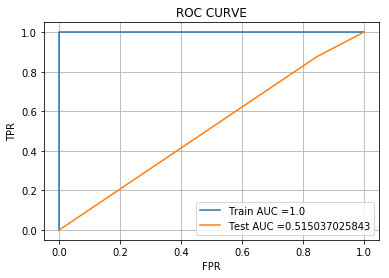

In [136]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_bow = DecisionTreeClassifier()
# print(dt_bow)
print(X_tr.shape)

dt_bow.fit(X_tr, y_train) 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt_bow.predict(X_tr)    
y_test_pred = dt_bow.predict(X_te)  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [137]:
import os
os.environ["PATH"]+=os.pathsep+'D:/ProgramFiles(x86)/Graphviz2.38/bin/'

In [138]:
# print(bow_lis)

In [255]:
# Please write all the code with proper documentation
import graphviz
import pydotplus
from sklearn import tree
import collections
from collections import defaultdict
from IPython.display import Image
import sys
print(sys.executable)
dot_data = tree.export_graphviz(clf1,out_file=None,filled=True,rounded=True,max_depth=3) 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree.png') 

c:\users\manoj kumar\appdata\local\programs\python\python36-32\python.exe


True

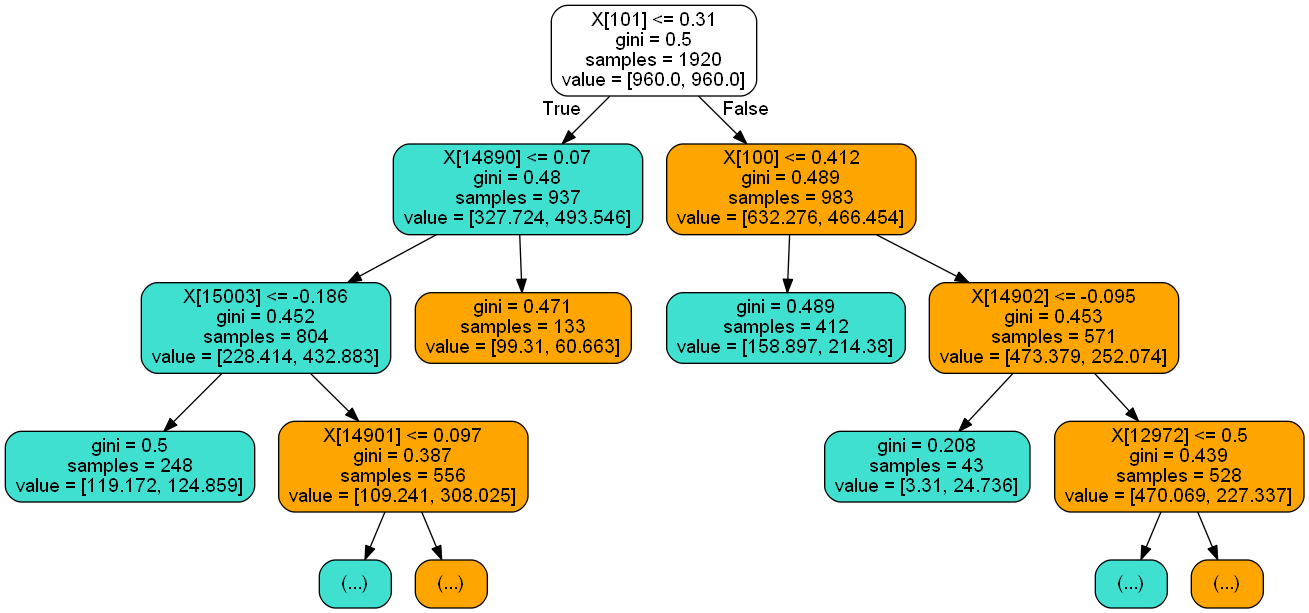

In [256]:
from IPython.display import Image
Image(r"C:\Users\MANOJ KUMAR\Desktop\Python\datsets\Assignments_DonorsChoose_2018-20190516T110022Z-001\Assignments_DonorsChoose_2018\tree.png")

In [162]:
# CONFUSION MATRIX
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global pred
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    pred=predictions
    return predictions

In [163]:
# CONFUSION MATRIX FOR TRAIN MATRIX
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 1.0 for threshold 1
Train confusion matrix
[[ 290    0]
 [   0 1630]]


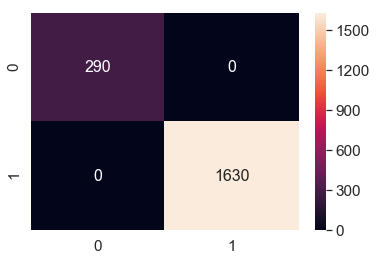

In [164]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [165]:
# CONFUSION MATRIX FOR TEST MATRIX
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 14  77]
 [ 63 446]]


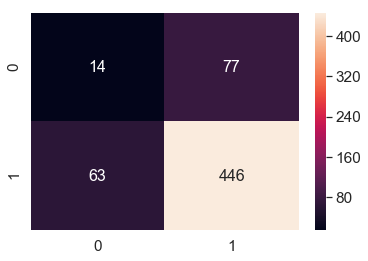

In [166]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [145]:
!python -m pip install --user --upgrade pip

Requirement already up-to-date: pip in c:\users\manoj kumar\appdata\roaming\python\python36\site-packages (19.2.3)


In [146]:
!pip install --upgrade setuptools

Requirement already up-to-date: setuptools in c:\users\manoj kumar\appdata\local\programs\python\python36-32\lib\site-packages (41.2.0)


In [147]:
os.environ["PATH"] += os.pathsep + r'C:\Users\MANOJ KUMAR\Desktop\graphviz'

In [150]:
X_test['essay'].values[1]

'My students are in second grade and half of them have a primary language other than English. \\r\\nOur school has the highest immigrant population of any school in our district and we are located in a high commercially developed area in the heart of our city. We are centrally located on the edge of urban and suburban neighborhoods. We have a very diverse ethnic student population including 50.6% Black, 19.7% Hispanic, 20.5% White, and 8% Multiracial. All of the students in our building receive free breakfast and lunch daily.Many of my students will arrive on the first day of school without the supplies needed to be successful in school.  Thankfully, our school has several community partners and they help supplement some of these basic supplies but we still have many students who need basic supplies such as crayons and pencils.\\r\\nI am requesting basic school supplies to prepare my students for the first day of school.  Your donation of basic school supplies will set my students up f

In [168]:
fpi = []
for i in range(len(y_test)) :
    if (y_test[i] == 0) & (pred[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

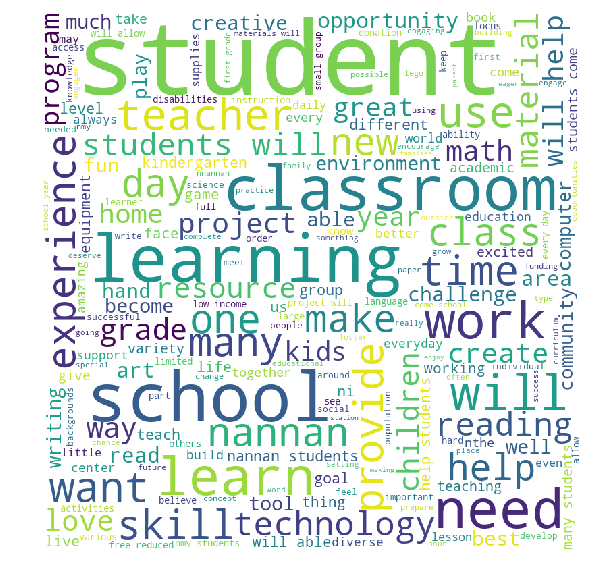

In [170]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in fp_essay1: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [171]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

14

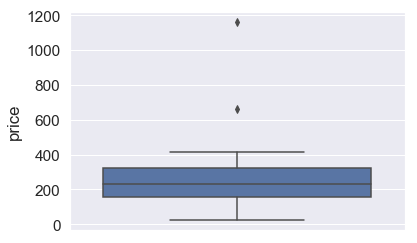

In [172]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

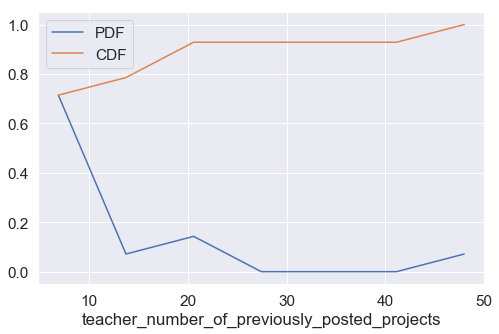

In [173]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

#### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [174]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_clean_cat_ohe,X_train_clean_subcategories_ohe,X_train_school_state_ohe,X_train_project_grade_category_ohe,X_train_teacher_prefix_ohe,X_train_price_std,X_train_quantity_std,X_train_teacher_number_of_previously_posted_projects_std, preprocessed_titles_project_title_ohe,preprocessed_essays_project_essay_ohe,X_train_essay_tfidf,X_train_titles_tfidf)).tocsr()
X_te = hstack((X_test_clean_cat_ohe,X_test_clean_subcategories_ohe,X_test_school_state_ohe,X_test_project_grade_category_ohe,X_test_teacher_prefix_ohe,X_test_price_std,X_test_quantity_std,X_test_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_test,preprocessed_essays_project_essay_ohe_test,X_test_titles_tfidf,X_test_essay_tfidf)).tocsr()
X_cr = hstack((X_cv_clean_cat_ohe,X_cv_clean_subcategories_ohe,X_cv_school_state_ohe,X_cv_project_grade_category_ohe,X_cv_teacher_prefix_ohe,X_cv_price_std,X_cv_quantity_std,X_cv_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_cv,preprocessed_essays_project_essay_ohe_cv,X_cv_titles_tfidf,X_cv_essay_tfidf)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(1920, 17624) (1920,)
(480, 17624) (480,)
(600, 17624) (600,)


In [249]:
# MODEL SELECTION

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math
import cmath
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

dt_tfidf = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf_tfidf = GridSearchCV(dt_tfidf,parameters,cv= 10,scoring='roc_auc',return_train_score=True)
clf_tfidf.fit(X_tr, y_train)
print("Best Hyper Parameters:",clf.best_params_)
#Prediction
prediction=clf_tfidf.predict(X_te)
clf1_tfidf=DecisionTreeClassifier(class_weight = 'balanced',max_depth=clf_tfidf.best_params_['max_depth'],min_samples_split=clf_tfidf.best_params_['min_samples_split'])
clf1_tfidf.fit(X_tr, y_train)
#evaluation(Accuracy)
prediction1=clf1_tfidf.predict(X_te)
print("Accuracy:",metrics.accuracy_score(prediction1,y_test))
# results = pd.DataFrame.from_dict(clf.cv_results_)
# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# lambdavalues=[0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
# log_alphavalues=[]
# for i in alphavalues:
#     log_alphavalues.append(math.log2(i))
# plt.plot(lambdavalues, train_auc, label='Train AUC')
# plt.plot(lambdavalues, cv_auc, label='CV AUC')
# plt.scatter(lambdavalues, train_auc, label='Train AUC points')
# plt.scatter(lambdavalues, cv_auc, label='CV AUC points')
# plt.legend()
# plt.xlabel("lambda: hyperparameter")
# plt.ylabel("AUC")
# plt.title("lambda: hyperparameter v/s AUC")
# plt.grid()
# plt.show()
# print(results)
# # print("*"*50)
# results.tail()
# print(results)

Best Hyper Parameters: {'max_depth': 10, 'min_samples_split': 500}
Accuracy: 0.643333333333


(1920, 15365)


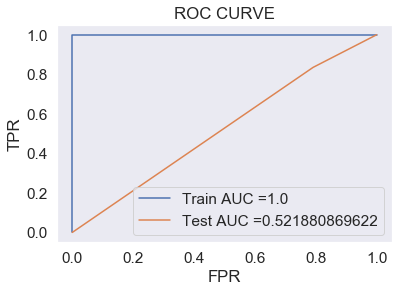

In [250]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_tfidf = DecisionTreeClassifier()
# print(dt_bow)
print(X_tr.shape)

dt_tfidf.fit(X_tr, y_train) 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt_tfidf.predict(X_tr)    
y_test_pred = dt_tfidf.predict(X_te)  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [257]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
import graphviz
import pydotplus
from sklearn import tree
import collections
from collections import defaultdict
from IPython.display import Image
import sys
print(sys.executable)
dot_data = tree.export_graphviz(clf1,out_file=None,filled=True,rounded=True,max_depth=3) 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree1.png') 

c:\users\manoj kumar\appdata\local\programs\python\python36-32\python.exe


True

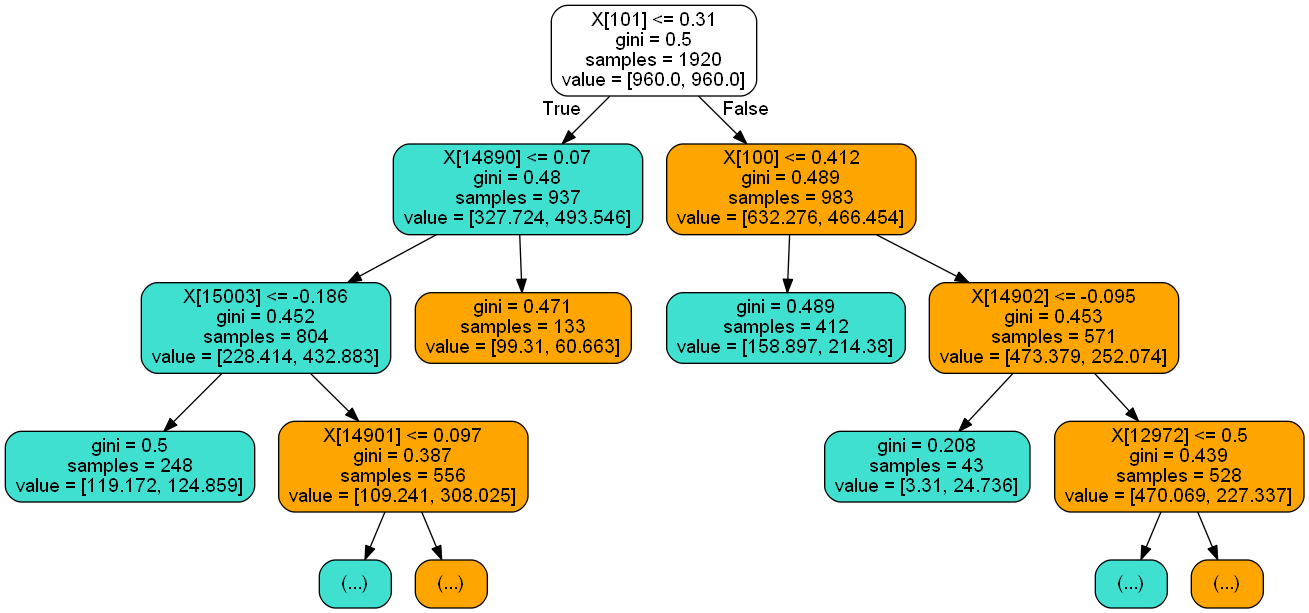

In [258]:
from IPython.display import Image
Image(r"C:\Users\MANOJ KUMAR\Desktop\Python\datsets\Assignments_DonorsChoose_2018-20190516T110022Z-001\Assignments_DonorsChoose_2018\tree1.png")

In [179]:
# CONFUSION MATRIX FOR TRAIN MATRIX
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 1.0 for threshold 1
Train confusion matrix
[[ 290    0]
 [   0 1630]]


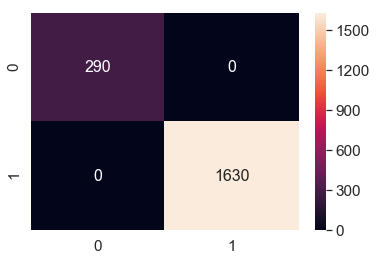

In [180]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [181]:
# CONFUSION MATRIX FOR TEST MATRIX
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 44  47]
 [174 335]]


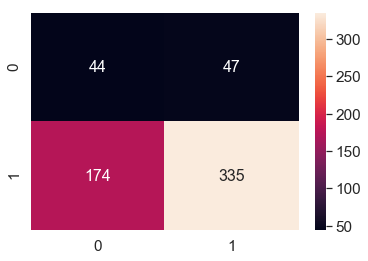

In [183]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [186]:
fpi = []
for i in range(len(y_test)) :
    if (y_test[i] == 0) & (pred[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

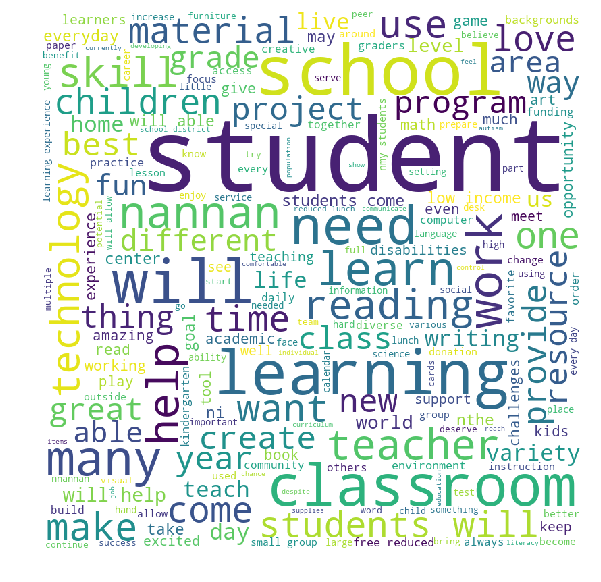

In [187]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in fp_essay1: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [188]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

8

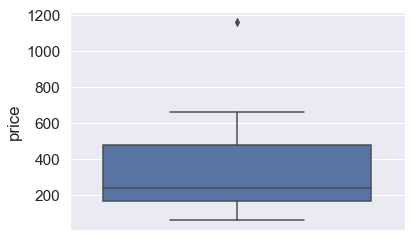

In [189]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

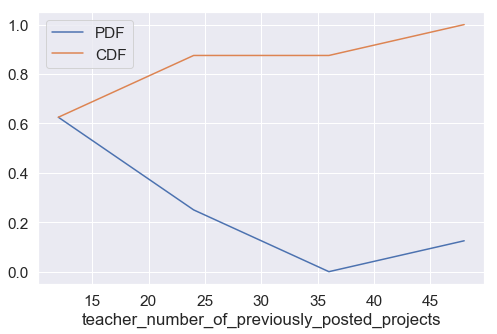

In [190]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [191]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_clean_cat_ohe,X_train_clean_subcategories_ohe,X_train_school_state_ohe,X_train_project_grade_category_ohe,X_train_teacher_prefix_ohe,X_train_price_std,X_train_quantity_std,X_train_teacher_number_of_previously_posted_projects_std, preprocessed_titles_project_title_ohe,preprocessed_essays_project_essay_ohe,X_train_avg_w2v_vectors_essays,X_train_avg_w2v_vectors_titles)).tocsr()
X_te = hstack((X_test_clean_cat_ohe,X_test_clean_subcategories_ohe,X_test_school_state_ohe,X_test_project_grade_category_ohe,X_test_teacher_prefix_ohe,X_test_price_std,X_test_quantity_std,X_test_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_test,preprocessed_essays_project_essay_ohe_test,X_test_avg_w2v_vectors_titles,X_test_avg_w2v_vectors_essays)).tocsr()
X_cr = hstack((X_cv_clean_cat_ohe,X_cv_clean_subcategories_ohe,X_cv_school_state_ohe,X_cv_project_grade_category_ohe,X_cv_teacher_prefix_ohe,X_cv_price_std,X_cv_quantity_std,X_cv_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_cv,preprocessed_essays_project_essay_ohe_cv,X_cv_avg_w2v_vectors_titles,X_cv_avg_w2v_vectors_essays)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(1920, 15365) (1920,)
(480, 15365) (480,)
(600, 15365) (600,)


In [192]:
# MODEL SELECTION

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math
import cmath
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

dt_avg_w2v = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt_avg_w2v,parameters,cv= 10,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)
print("Best Hyper Parameters:",clf.best_params_)
#Prediction
prediction=clf.predict(X_te)
clf1=DecisionTreeClassifier(class_weight = 'balanced',max_depth=clf.best_params_['max_depth'],min_samples_split=clf.best_params_['min_samples_split'])
clf1.fit(X_tr, y_train)
#evaluation(Accuracy)
prediction1=clf1.predict(X_te)
print("Accuracy:",metrics.accuracy_score(prediction1,y_test))
# results = pd.DataFrame.from_dict(clf.cv_results_)
# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# lambdavalues=[0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
# log_alphavalues=[]
# for i in alphavalues:
#     log_alphavalues.append(math.log2(i))
# plt.plot(lambdavalues, train_auc, label='Train AUC')
# plt.plot(lambdavalues, cv_auc, label='CV AUC')
# plt.scatter(lambdavalues, train_auc, label='Train AUC points')
# plt.scatter(lambdavalues, cv_auc, label='CV AUC points')
# plt.legend()
# plt.xlabel("lambda: hyperparameter")
# plt.ylabel("AUC")
# plt.title("lambda: hyperparameter v/s AUC")
# plt.grid()
# plt.show()
# print(results)
# # print("*"*50)
# results.tail()
# print(results)

Best Hyper Parameters: {'max_depth': 10, 'min_samples_split': 500}
Accuracy: 0.733333333333


(1920, 15365)


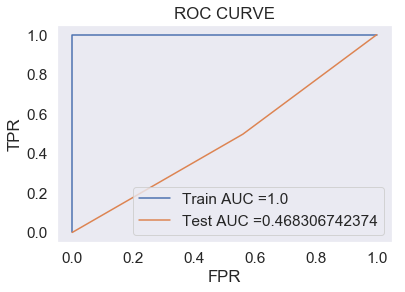

In [196]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_avg_w2v = DecisionTreeClassifier()
# print(dt_bow)
print(X_tr.shape)

dt_avg_w2v.fit(X_tr, y_train) 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt_avg_w2v.predict(X_tr)    
y_test_pred = dt_avg_w2v.predict(X_te)  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### 2.4.3.1 Graphviz visualization of Decision Tree on AVG W2V,<font color='red'> SET 2</font>

In [259]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
import graphviz
import pydotplus
from sklearn import tree
import collections
from collections import defaultdict
from IPython.display import Image
import sys
print(sys.executable)
dot_data = tree.export_graphviz(clf1,out_file=None,filled=True,rounded=True,max_depth=3) 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree2.png') 

c:\users\manoj kumar\appdata\local\programs\python\python36-32\python.exe


True

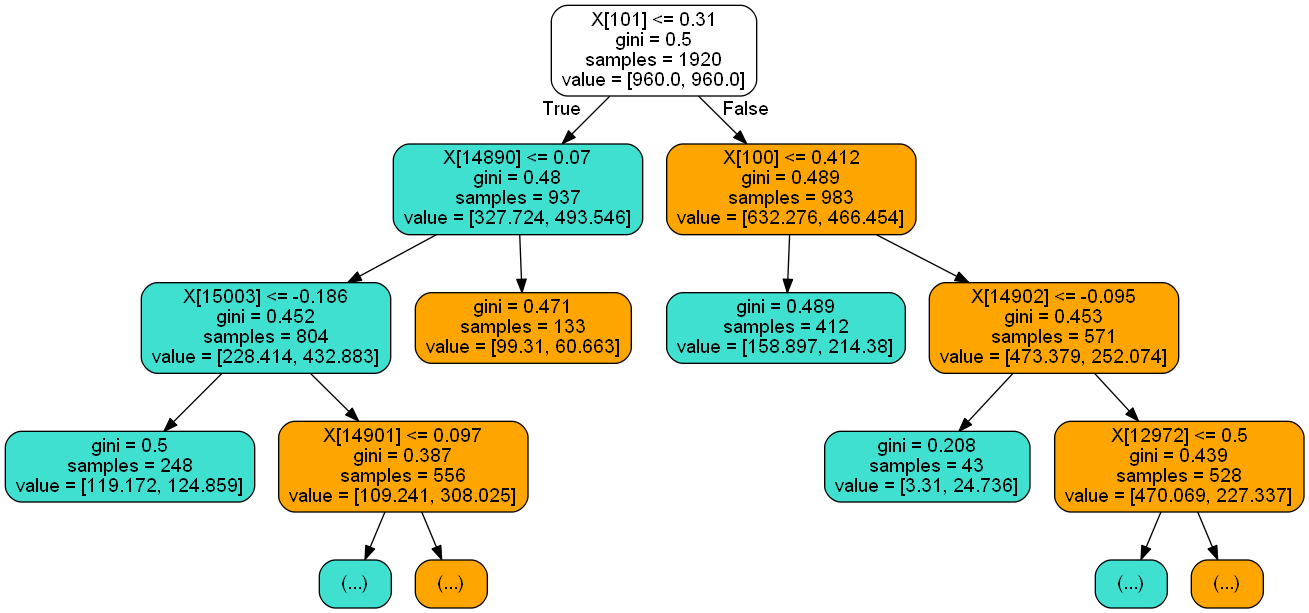

In [260]:
from IPython.display import Image
Image(r"C:\Users\MANOJ KUMAR\Desktop\Python\datsets\Assignments_DonorsChoose_2018-20190516T110022Z-001\Assignments_DonorsChoose_2018\tree2.png")

In [198]:
# CONFUSION MATRIX FOR TRAIN MATRIX
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 1.0 for threshold 1
Train confusion matrix
[[ 290    0]
 [   0 1630]]


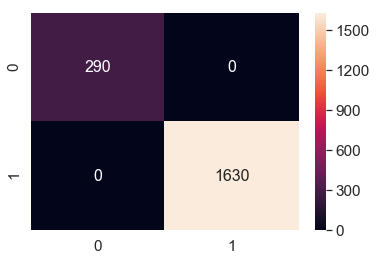

In [199]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [200]:
# CONFUSION MATRIX FOR TEST MATRIX
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 40  51]
 [256 253]]


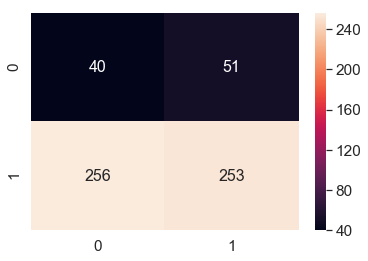

In [201]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [202]:
fpi = []
for i in range(len(y_test)) :
    if (y_test[i] == 0) & (pred[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

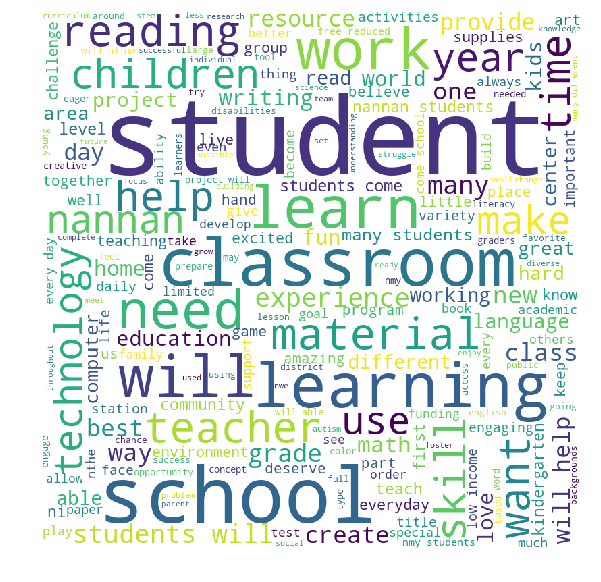

In [203]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in fp_essay1: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [204]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

8

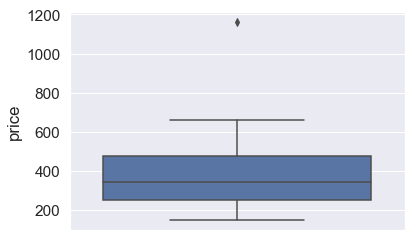

In [205]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

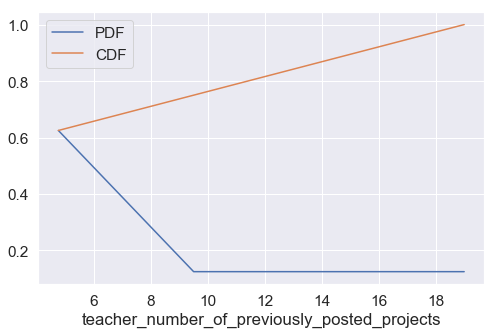

In [206]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [207]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_clean_cat_ohe,X_train_clean_subcategories_ohe,X_train_school_state_ohe,X_train_project_grade_category_ohe,X_train_teacher_prefix_ohe,X_train_price_std,X_train_quantity_std,X_train_teacher_number_of_previously_posted_projects_std, preprocessed_titles_project_title_ohe,preprocessed_essays_project_essay_ohe,X_train_tfidf_w2v_vectors_essays,X_train_tfidf_w2v_vectors_titles)).tocsr()
X_te = hstack((X_test_clean_cat_ohe,X_test_clean_subcategories_ohe,X_test_school_state_ohe,X_test_project_grade_category_ohe,X_test_teacher_prefix_ohe,X_test_price_std,X_test_quantity_std,X_test_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_test,preprocessed_essays_project_essay_ohe_test,X_test_tfidf_w2v_vectors_essays,X_test_tfidf_w2v_vectors_titles)).tocsr()
X_cr = hstack((X_cv_clean_cat_ohe,X_cv_clean_subcategories_ohe,X_cv_school_state_ohe,X_cv_project_grade_category_ohe,X_cv_teacher_prefix_ohe,X_cv_price_std,X_cv_quantity_std,X_cv_teacher_number_of_previously_posted_projects_std,preprocessed_titles_project_title_ohe_cv,preprocessed_essays_project_essay_ohe_cv,X_cv_tfidf_w2v_vectors_essays,X_cv_tfidf_w2v_vectors_titles)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

Final Data matrix
(1920, 15365) (1920,)
(480, 15365) (480,)
(600, 15365) (600,)


In [208]:
# MODEL SELECTION

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math
import cmath
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

dt_tfidf_w2v = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf = GridSearchCV(dt_tfidf_w2v,parameters,cv= 10,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)
print("Best Hyper Parameters:",clf.best_params_)
#Prediction
prediction=clf.predict(X_te)
clf1=DecisionTreeClassifier(class_weight = 'balanced',max_depth=clf.best_params_['max_depth'],min_samples_split=clf.best_params_['min_samples_split'])
clf1.fit(X_tr, y_train)
#evaluation(Accuracy)
prediction1=clf1.predict(X_te)
print("Accuracy:",metrics.accuracy_score(prediction1,y_test))
# results = pd.DataFrame.from_dict(clf.cv_results_)
# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# lambdavalues=[0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
# log_alphavalues=[]
# for i in alphavalues:
#     log_alphavalues.append(math.log2(i))
# plt.plot(lambdavalues, train_auc, label='Train AUC')
# plt.plot(lambdavalues, cv_auc, label='CV AUC')
# plt.scatter(lambdavalues, train_auc, label='Train AUC points')
# plt.scatter(lambdavalues, cv_auc, label='CV AUC points')
# plt.legend()
# plt.xlabel("lambda: hyperparameter")
# plt.ylabel("AUC")
# plt.title("lambda: hyperparameter v/s AUC")
# plt.grid()
# plt.show()
# print(results)
# # print("*"*50)
# results.tail()
# print(results)

Best Hyper Parameters: {'max_depth': 10, 'min_samples_split': 500}
Accuracy: 0.643333333333


(1920, 15365)


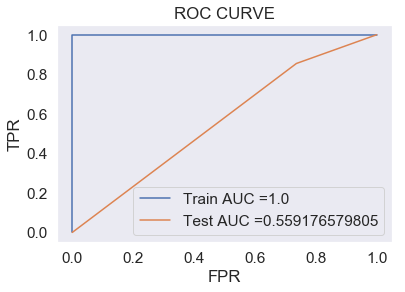

In [209]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_tfidf_w2v = DecisionTreeClassifier()
# print(dt_bow)
print(X_tr.shape)

dt_tfidf_w2v.fit(X_tr, y_train) 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt_tfidf_w2v.predict(X_tr)    
y_test_pred = dt_tfidf_w2v.predict(X_te)  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### 2.4.4.1 Graphviz visualization of Decision Tree on TFIDF W2V,<font color='red'> SET 2</font>

In [261]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
import graphviz
import pydotplus
from sklearn import tree
import collections
from collections import defaultdict
from IPython.display import Image
import sys
print(sys.executable)
dot_data = tree.export_graphviz(clf1,out_file=None,filled=True,rounded=True,max_depth=3) 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree4.png') 

c:\users\manoj kumar\appdata\local\programs\python\python36-32\python.exe


True

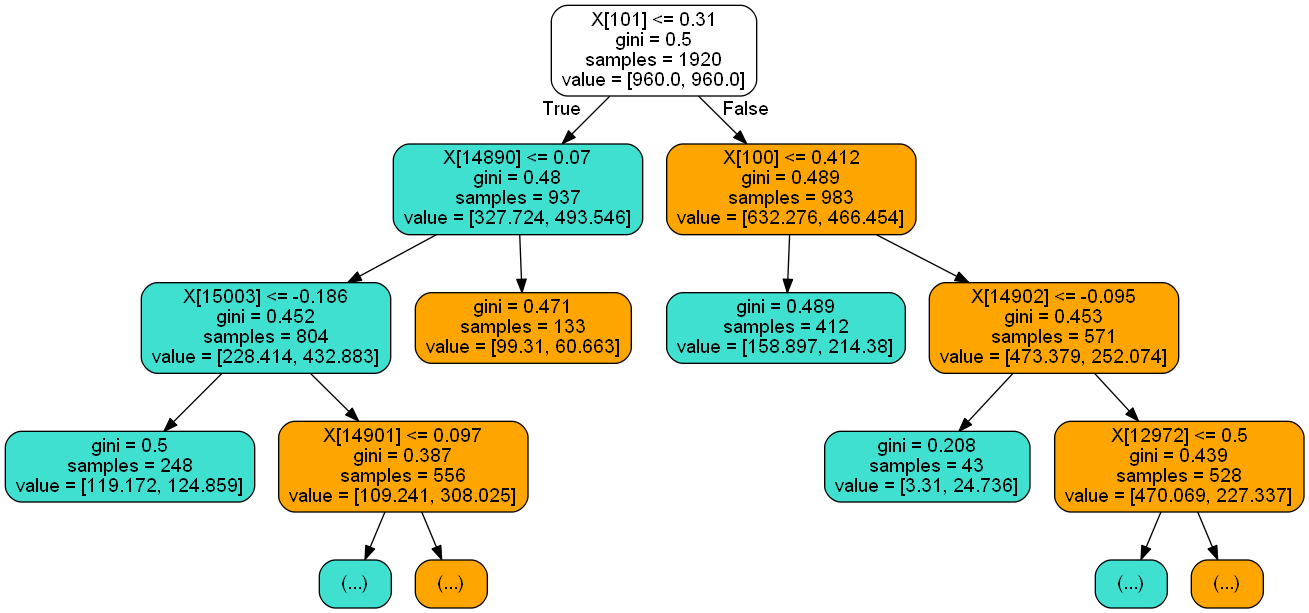

In [262]:
from IPython.display import Image
Image(r"C:\Users\MANOJ KUMAR\Desktop\Python\datsets\Assignments_DonorsChoose_2018-20190516T110022Z-001\Assignments_DonorsChoose_2018\tree4.png")

In [211]:
# CONFUSION MATRIX FOR TRAIN MATRIX
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 1.0 for threshold 1
Train confusion matrix
[[ 290    0]
 [   0 1630]]


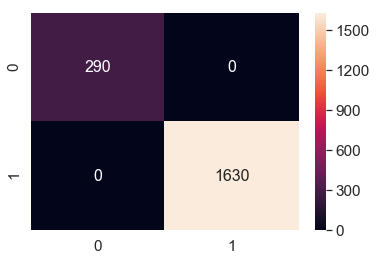

In [212]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [213]:
# CONFUSION MATRIX FOR TEST MATRIX
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 24  67]
 [ 74 435]]


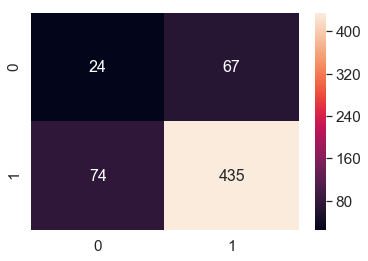

In [215]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [240]:
fpi = []
for i in range(len(y_test)) :
    if (y_test[i] == 0) & (pred[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

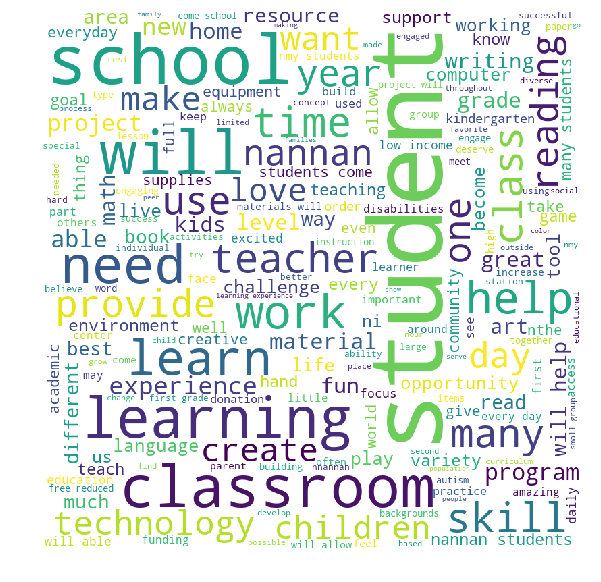

In [243]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in fp_essay1: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [244]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

11

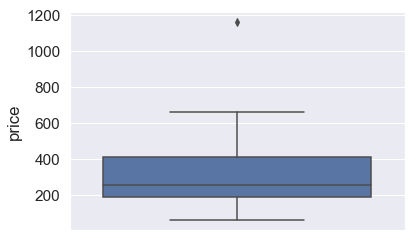

In [219]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

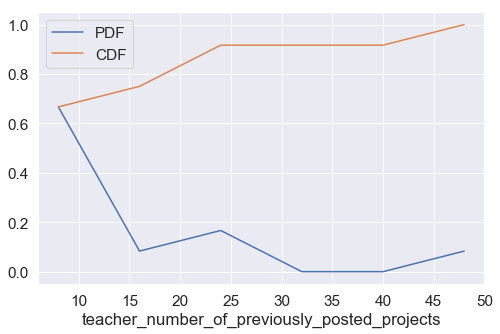

In [220]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [226]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

def selectKImportance(model, X, k=5):
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]



In [229]:
X_set5_train = selectKImportance(clf, X_tr,5000)

print(X_set5_train.shape)

(1920, 5000)


In [230]:
# MODEL SELECTION

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math
import cmath
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing

dt_tfidf_impfeat = DecisionTreeClassifier(class_weight = 'balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 20, 45, 75, 100, 135, 270, 500]}
clf_imp_feat = GridSearchCV(dt_tfidf_impfeat,parameters,cv= 10,scoring='roc_auc',return_train_score=True)
clf_imp_feat.fit(X_tr, y_train)
print("Best Hyper Parameters:",clf_imp_feat.best_params_)
#Prediction
prediction=clf_imp_feat.predict(X_te)
clf1_imp_feat=DecisionTreeClassifier(class_weight = 'balanced',max_depth=clf_imp_feat.best_params_['max_depth'],min_samples_split=clf_imp_feat.best_params_['min_samples_split'])
clf1_imp_feat.fit(X_tr, y_train)
#evaluation(Accuracy)
prediction1=clf1_imp_feat.predict(X_te)
print("Accuracy:",metrics.accuracy_score(prediction1,y_test))
# results = pd.DataFrame.from_dict(clf.cv_results_)
# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# lambdavalues=[0.5, 0.1, 0.05, 0.01, 0.005, 0.004, 0.003]
# log_alphavalues=[]
# for i in alphavalues:
#     log_alphavalues.append(math.log2(i))
# plt.plot(lambdavalues, train_auc, label='Train AUC')
# plt.plot(lambdavalues, cv_auc, label='CV AUC')
# plt.scatter(lambdavalues, train_auc, label='Train AUC points')
# plt.scatter(lambdavalues, cv_auc, label='CV AUC points')
# plt.legend()
# plt.xlabel("lambda: hyperparameter")
# plt.ylabel("AUC")
# plt.title("lambda: hyperparameter v/s AUC")
# plt.grid()
# plt.show()
# print(results)
# # print("*"*50)
# results.tail()
# print(results)

Best Hyper Parameters: {'max_depth': 10, 'min_samples_split': 500}
Accuracy: 0.643333333333


(1920, 15365)


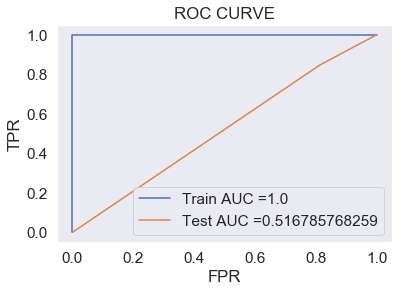

In [231]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

dt_tfidf_impfeat = DecisionTreeClassifier()
# print(dt_bow)
print(X_tr.shape)

dt_tfidf_impfeat.fit(X_tr, y_train) 
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = dt_tfidf_impfeat.predict(X_tr)    
y_test_pred = dt_tfidf_impfeat.predict(X_te)  

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

#### 2.5.1 Graphviz visualization of Decision Tree on 5000 Features Using TFIDF,<font color='red'> SET 2</font>

In [263]:
# Please write all the code with proper documentation
# Please write all the code with proper documentation
import graphviz
import pydotplus
from sklearn import tree
import collections
from collections import defaultdict
from IPython.display import Image
import sys
print(sys.executable)
dot_data = tree.export_graphviz(clf1,out_file=None,filled=True,rounded=True,max_depth=3) 
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('5000.png') 

c:\users\manoj kumar\appdata\local\programs\python\python36-32\python.exe


True

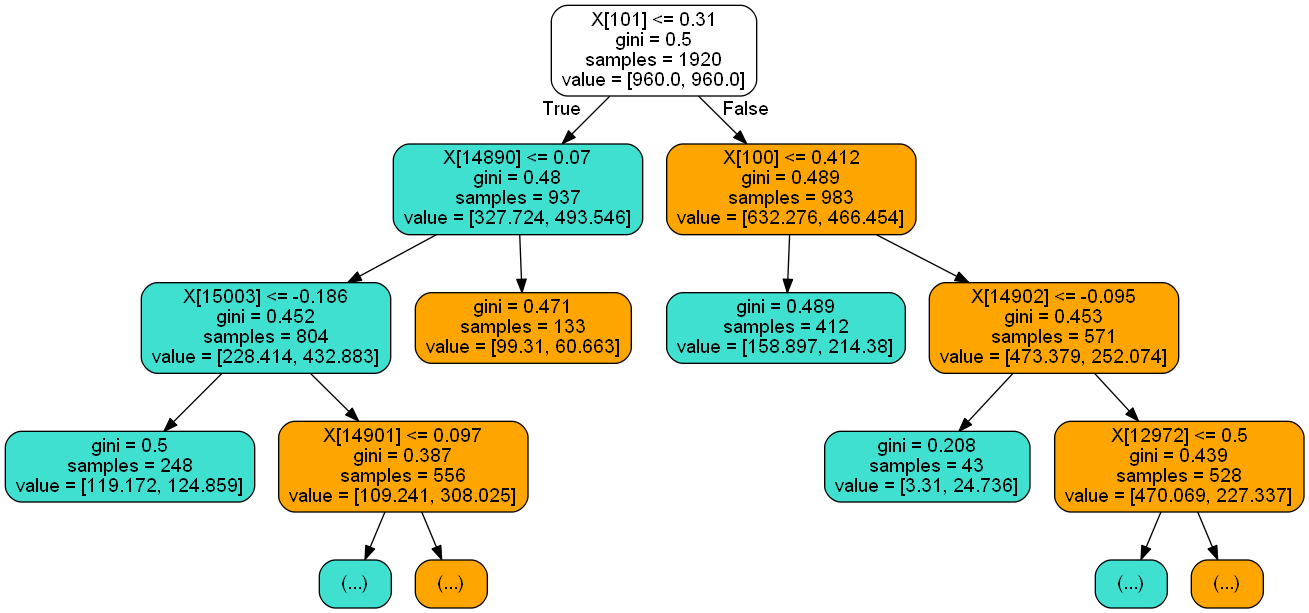

In [264]:
from IPython.display import Image
Image(r"C:\Users\MANOJ KUMAR\Desktop\Python\datsets\Assignments_DonorsChoose_2018-20190516T110022Z-001\Assignments_DonorsChoose_2018\5000.png")

In [233]:
# CONFUSION MATRIX FOR TRAIN MATRIX
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))

the maximum value of tpr*(1-fpr) 1.0 for threshold 1
Train confusion matrix
[[ 290    0]
 [   0 1630]]


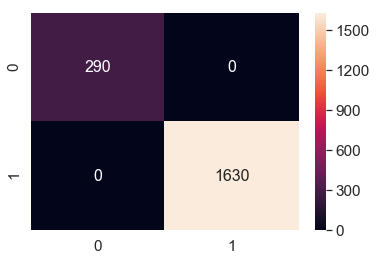

In [234]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [235]:
# CONFUSION MATRIX FOR TEST MATRIX
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

Test confusion matrix
[[ 17  74]
 [ 78 431]]


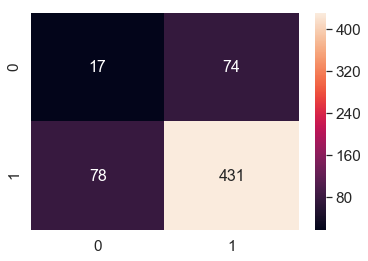

In [237]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), annot=True,annot_kws={"size": 16}, fmt='g')

In [238]:
fpi = []
for i in range(len(y_test)) :
    if (y_test[i] == 0) & (pred[i] == 1) :
        fpi.append(i)
fp_essay1 = []
for i in fpi :
    fp_essay1.append(X_test['essay'].values[i])

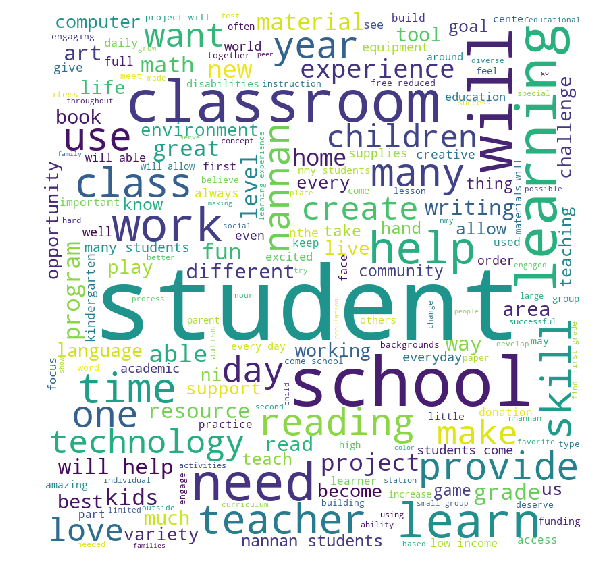

In [239]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for val in fp_essay1: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [245]:
# first get the columns:
cols = X_test.columns
X_test_falsePos1 = pd.DataFrame(columns=cols)

# get the data of the false pisitives
for i in fpi : # (in fpi all the false positives data points indexes)
    X_test_falsePos1 = X_test_falsePos1.append(X_test.filter(items=[i], axis=0))

X_test_falsePos1.head(1)
len(X_test_falsePos1)

11

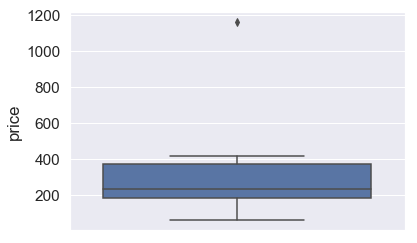

In [246]:
##Box Plot (FP 'price')
sns.boxplot(y='price', data=X_test_falsePos1)

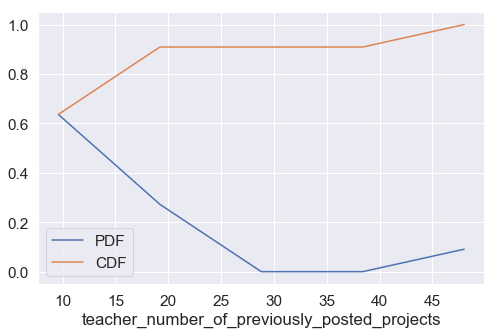

In [247]:
#PDF (FP ,teacher_number_of_previously_posted_projects)
plt.figure(figsize=(8,5))
counts, bin_edges = np.histogram(X_test_falsePos1['teacher_number_of_previously_posted_projects'],bins='auto', density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
pdfP, = plt.plot(bin_edges[1:], pdf)
cdfP, = plt.plot(bin_edges[1:], cdf)
plt.legend([pdfP, cdfP], ["PDF", "CDF"])
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.show()

<h1>3. Conclusion</h1>

In [248]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= (" Vectorizer ", " Max_depth ", " Min_sample_split "," Test -AUC ")
tb.add_row([" BOW ", 100, 270, 0.60])
tb.add_row([" Tf - Idf", 10 , 500 ,0.64 ])
tb.add_row([" AVG-W2V", 5, 500,0.73 ])
tb.add_row(["A VG - Tf - Idf", 5 , 500 ,0.64])
tb.add_row(["Top 5000 Features", 10, 500 ,0.64 ])
print(tb.get_string(titles = "Decision trees- Observations"))

+-------------------+-------------+--------------------+-------------+
|     Vectorizer    |  Max_depth  |  Min_sample_split  |  Test -AUC  |
+-------------------+-------------+--------------------+-------------+
|        BOW        |     100     |        270         |     0.6     |
|      Tf - Idf     |      10     |        500         |     0.64    |
|       AVG-W2V     |      5      |        500         |     0.73    |
|  A VG - Tf - Idf  |      5      |        500         |     0.64    |
| Top 5000 Features |      10     |        500         |     0.64    |
+-------------------+-------------+--------------------+-------------+
